# Social Media Impact on students' mental health

In [46]:
import pandas as pd

df = pd.read_csv("Students Social Media Addiction.csv").drop(columns=["Student_ID"])

df.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


# ACP + K-means

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes('number').columns
data_numeric = df[numeric_columns]
standard_scaler = StandardScaler()
data_scaled = standard_scaler.fit_transform(data_numeric)
pca = PCA(n_components=3)

pca.fit_transform(data_numeric)

array([[ 1.11756   , -0.19567913,  0.37825357],
       [-6.13378804, -0.69714868, -0.84983631],
       [ 2.71624872,  1.71101583, -0.08864549],
       ...,
       [-0.58867692, -3.41789275, -0.60052922],
       [ 5.67429994, -1.29259157,  0.09172949],
       [ 3.14539144, -1.447621  ,  0.40805191]])

In [48]:
ratio = pca.explained_variance_ratio_ * 100        # % par composante
cum = np.cumsum(ratio)                             # variance cumulée

# Vérification rapide (affiche les valeurs)
print("Variance individuelle (%):", np.round(ratio, 3))
print("Variance cumulée (%):    ", np.round(cum, 3))

Variance individuelle (%): [65.161 28.116  3.564]
Variance cumulée (%):     [65.161 93.277 96.841]


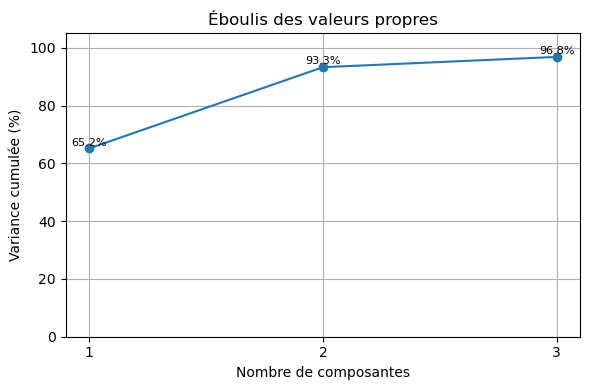

In [49]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum)+1), cum, marker='o')
plt.xticks(range(1, len(cum)+1))
for i, v in enumerate(cum, start=1):
    plt.text(i, v+1.0, f"{v:.1f}%", ha='center', fontsize=8)  # annoter les points

plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée (%)")
plt.title("Éboulis des valeurs propres")
plt.ylim(0, 105)
plt.grid(True)
plt.tight_layout()
plt.show()

,PC1,PC2,PC3
Age,-0.460025,0.885870,-0.040075
Avg_Daily_Usage_Hours,0.377110,0.187257,-0.490850
Sleep_Hours_Per_Night,-0.351688,-0.137071,0.666915
Mental_Health_Score,-0.375419,-0.187661,-0.309073
Conflicts_Over_Social_Media,0.335336,0.161285,0.303756
Addicted_Score,0.518739,0.316467,0.353400


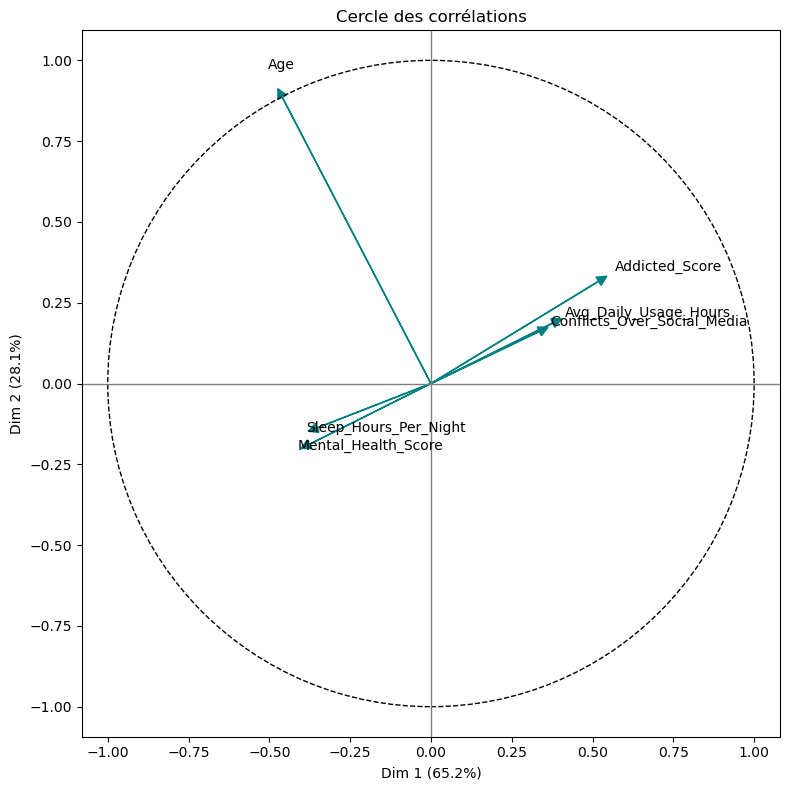

In [50]:
# Coordonnées des variables
pcs = pca.components_

plt.figure(figsize=(8, 8))
plt.axhline(0, color="grey", lw=1)
plt.axvline(0, color="grey", lw=1)


for i in range(len(numeric_columns)):
    plt.arrow(
        0, 0, pcs[0, i], pcs[1, i], head_width=0.03, head_length=0.03, color="teal"
    )
    plt.text(pcs[0, i] * 1.1, pcs[1, i] * 1.1, numeric_columns[i])

circle = plt.Circle((0, 0), 1, facecolor="none", edgecolor="black", linestyle="--")  # type: ignore
plt.gca().add_patch(circle)

display(
    pd.DataFrame(
        pca.components_.T,
        columns=[f"PC{i}" for i in range(1, len(pca.components_) + 1)],
        index=data_numeric.columns,
    )
)

plt.xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Cercle des corrélations")
plt.axis("equal")
plt.tight_layout()
plt.show()

**Interprétation** :  
D'après le cercle des corrélations et le tableau des composantes principales ci-dessus, on peut voir que `Addicted_Score` contribue le plus à `PC1` (Dim 1) positivement, tandis que `Avg_Daily_Usage_Hours`, `Sleep_Hours_Per_Night`, `Mental_Health_Score` et `Conflicts_Over_Social_Media` contribuent à peu près de la même manière. On observe également que `Addicted_Score`, `Avg_Daily_Usage_Hours` et `Conflicts_Over_Social_Media` sont fortement positivement corrélés. De plus, `Sleep_Hours_Per_Night` et `Mental_Health_Score` sont aussi fortement positivement corrélés entre eux.

Un autre point à noter est que `Sleep_Hours_Per_Night` et `Mental_Health_Score` sont fortement négativement corrélés avec `Addicted_Score`, `Avg_Daily_Usage_Hours` et `Conflicts_Over_Social_Media`.

On peut dire que `PC1` représente une `Utilisation Élevée`.

Pour `PC2`, on constate que `Age` contribue le plus et de manière importante à `PC2`, tandis que les autres variables n'y contribuent pas significativement, ce qui suggère que `PC2` représente l'âge des étudiants.

En haut à gauche :


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
6,23,1.5,8.0,9,0,2
673,24,4.5,7.3,7,2,5
52,24,2.4,7.2,8,1,4
579,23,5.2,7.0,6,3,6
16,24,2.0,7.8,8,0,3
64,23,2.3,7.4,8,1,3


En haut à droite :


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
624,24,7.0,5.8,4,5,9
607,21,7.1,5.7,4,5,9
616,22,6.8,5.9,4,5,9
701,23,6.8,5.9,4,5,9
140,22,4.7,6.9,5,4,8
677,23,6.8,6.0,5,4,8


En bas à gauche :


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
781,16,4.9,7.0,7,2,5
3,18,3.0,7.0,7,1,4
8,18,4.0,6.5,7,1,5
324,19,4.0,7.9,8,2,4
484,19,2.3,9.5,8,2,4
652,20,4.3,7.5,8,2,4


En bas à droite :


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
761,16,7.2,4.4,4,5,9
731,16,6.0,5.7,5,3,7
744,17,5.6,5.8,5,3,7
720,17,6.8,5.2,5,4,9
713,16,6.9,5.1,5,4,9
706,17,7.1,5.0,4,4,9


count    905.000000
mean      19.740331
std        2.135866
min       16.000000
25%       19.000000
50%       20.000000
75%       21.000000
max       24.000000
Name: Age, dtype: float64

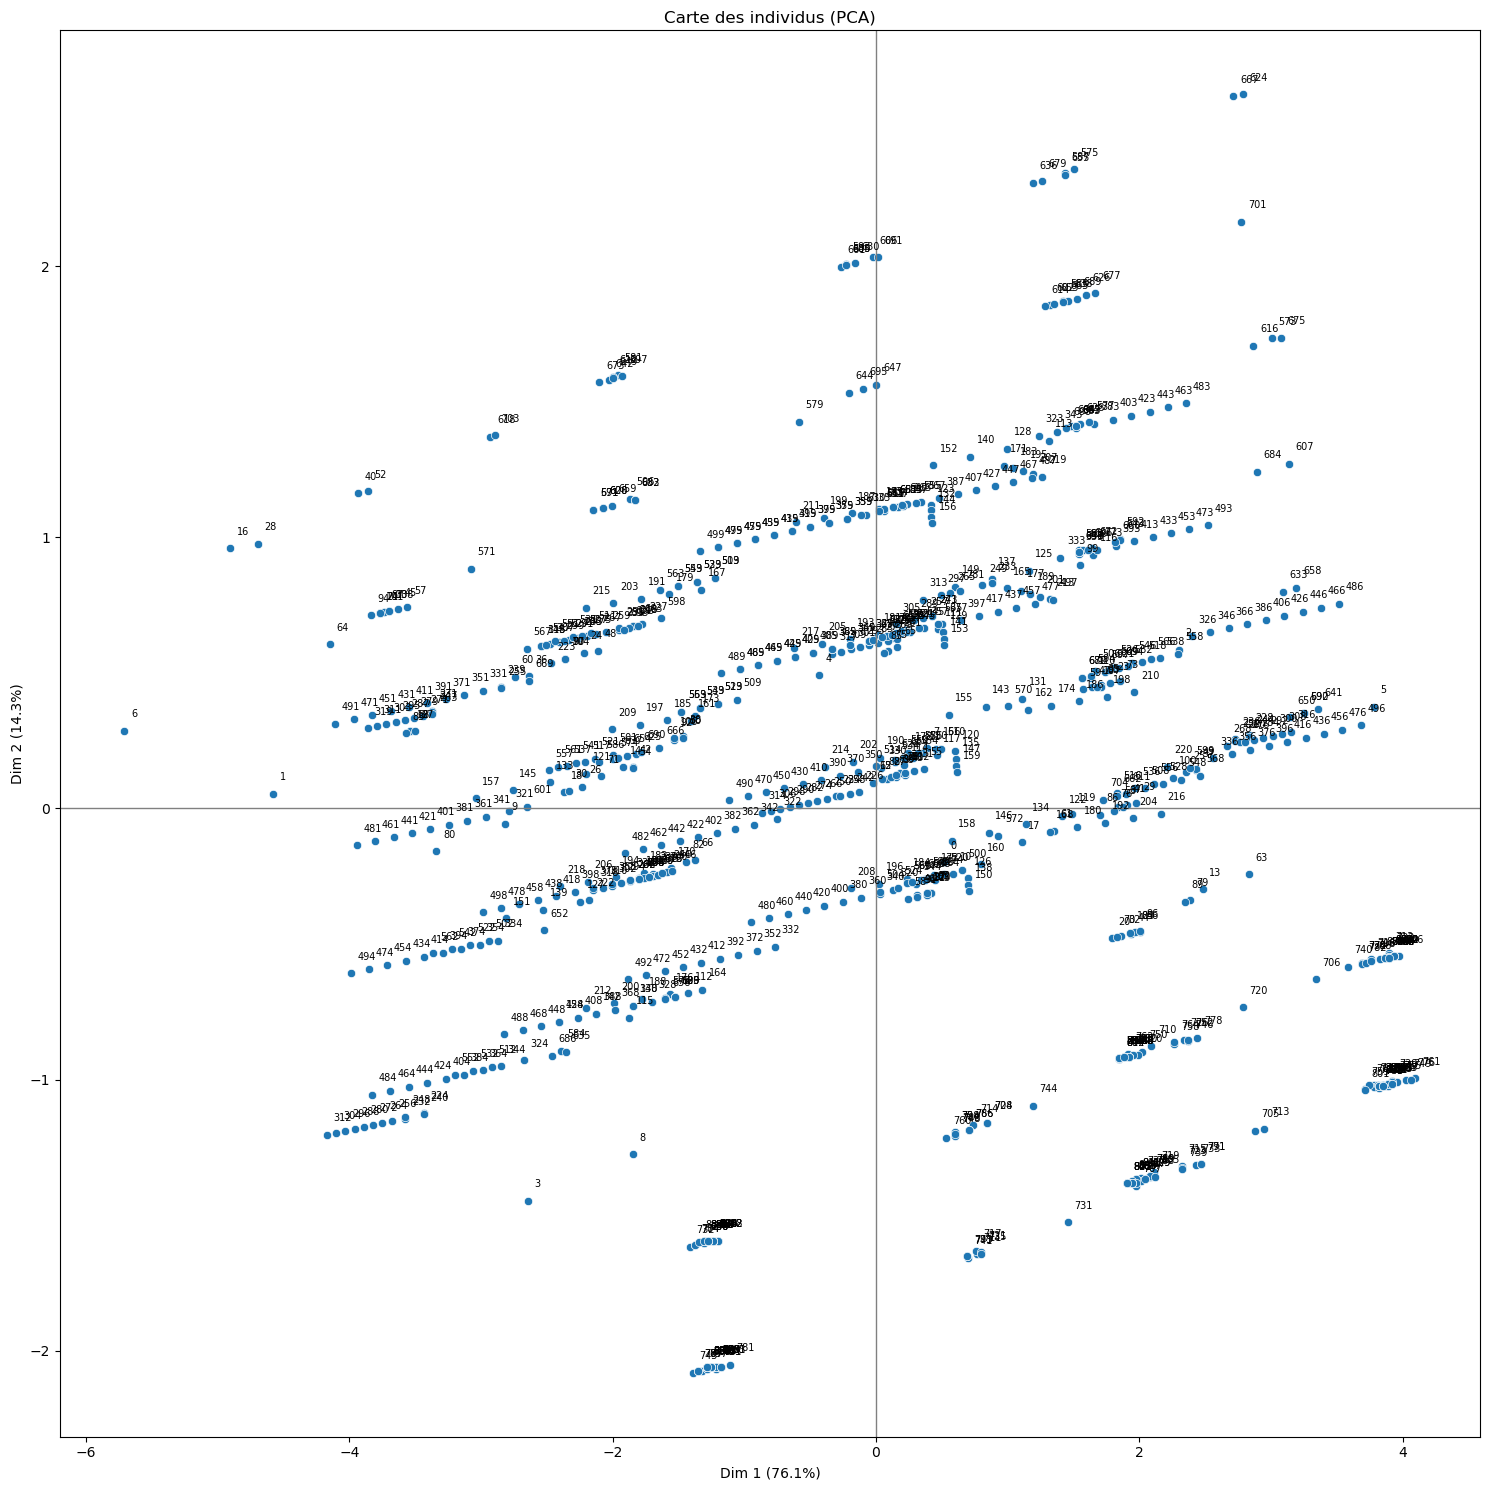

In [51]:
# Compute PCA coordinates for individuals
coords = pca.fit_transform(data_scaled)

plt.figure(figsize=(15, 15))
sns.scatterplot(x=coords[:, 0], y=coords[:, 1])

for i, label in enumerate(df.index):
    plt.text(coords[i, 0] + 0.05, coords[i, 1] + 0.05, label, fontsize=7)


print("En haut à gauche :")
display(df.loc[[6, 673, 52, 579, 16, 64], numeric_columns])

print("En haut à droite :")
display(df.loc[[624, 607, 616, 701, 140, 677], numeric_columns])

print("En bas à gauche :")
display(df.loc[[781, 3, 8, 324, 484, 652], numeric_columns])

print("En bas à droite :")
display(df.loc[[761, 731, 744, 720, 713, 706], numeric_columns])

display(df["Age"].describe())

plt.axhline(0, color="grey", lw=1)
plt.axvline(0, color="grey", lw=1)

plt.xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Carte des individus (PCA)")
plt.tight_layout()
plt.show()

**Interprétation** :  
D'après la carte des individus et les DataFrames affichés, où chaque DataFrame contient 6 étudiants échantillons de chaque zone de la carte, nous pouvons observer que les individus de la zone _GAUCHE_ présentent :
- **moins** d'`Avg_Daily_Usage_Hours`
- **plus** de `Sleep_Hours_Per_Night`
- un **meilleur** `Mental_Health_Score`
- **moins** de `Conflicts_Over_Social_Media`
- un **moindre** `Addicted_Score`

que ceux de la zone _DROITE_.

De plus, nous pouvons constater que les étudiants de la zone _HAUT_ sont **plus âgés** que ceux de la zone _BAS_.

En conclusion de cette analyse intéressante, nous pouvons classer les étudiants de notre ensemble de données en deux importantes catégories de **mode de vie** :
- Les étudiants ayant un **bon mode de vie**
- Les étudiants ayant un **mauvais mode de vie**

# K-Means

## 1. Encoding

In [52]:
df.head(10)

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


In [53]:
cat_columns = (
    df.select_dtypes("object")
    .drop(columns=["Region_Group", "High_Usage"], errors="ignore")
    .columns
)
nominal_cat_columns = [
    "Gender",
    "Country",
    "Most_Used_Platform",
    "Relationship_Status",
]
ordinal_cat_columns = list(set(cat_columns) ^ set(nominal_cat_columns))

print("Colonnes catégorielles nominales :")
display(nominal_cat_columns)

print("Colonnes catégorielles ordinales :")
display(ordinal_cat_columns)

Colonnes catégorielles nominales :


['Gender', 'Country', 'Most_Used_Platform', 'Relationship_Status']

Colonnes catégorielles ordinales :


['Academic_Level', 'Affects_Academic_Performance']

In [54]:
from category_encoders import OrdinalEncoder, OneHotEncoder

df_copy = df.copy()
ordinal_encoder = OrdinalEncoder(
    cols=ordinal_cat_columns,
    mapping=[
        {
            "col": "Academic_Level",
            "mapping": {
                "High School": 0,
                "Undergraduate": 1,
                "Graduate": 2,
            },
        },
        {
            "col": "Affects_Academic_Performance",
            "mapping": {
                "No": 0,
                "Yes": 1,
            },
        },
    ],
)
one_hot_encoder = OneHotEncoder(return_df=True, use_cat_names=True)

df_copy[ordinal_cat_columns] = ordinal_encoder.fit_transform(
    df_copy[ordinal_cat_columns]
)
df_copy = pd.concat(
    [
        df_copy.drop(columns=nominal_cat_columns),
        one_hot_encoder.fit_transform(df_copy[nominal_cat_columns]),  # type: ignore
    ],
    axis=1,
)  # type: ignore

df_copy

,Age,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Female,Gender_Male,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_LINE,Most_Used_Platform_KakaoTalk,Most_Used_Platform_VKontakte,Most_Used_Platform_WhatsApp,Most_Used_Platform_WeChat,Relationship_Status_In Relationship,Relationship_Status_Single,Relationship_Status_Complicated
0,19,1,5.2,1,6.5,6,3,8,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,2.1,0,7.5,8,0,3,0,1,...,0,0,0,0,0,0,0,0,1,0
2,20,1,6.0,1,5.0,5,4,9,1,0,...,0,0,0,0,0,0,0,0,0,1
3,18,0,3.0,0,7.0,7,1,4,0,1,...,0,0,0,0,0,0,0,0,1,0
4,21,2,4.5,1,6.0,6,2,7,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,17,0,7.0,1,4.5,4,5,9,0,1,...,0,1,0,0,0,0,0,1,0,0
901,16,0,5.5,1,5.9,5,4,8,1,0,...,0,0,0,0,0,0,0,0,0,1
902,17,0,4.9,0,7.2,7,2,5,0,1,...,0,0,0,0,0,0,0,0,1,0
903,16,0,6.8,1,4.7,4,5,9,1,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
standard_scaler = StandardScaler()
df_copy = pd.DataFrame(
    standard_scaler.fit_transform(df_copy), columns=df_copy.columns, index=df_copy.index
)

df_copy

,Age,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Female,Gender_Male,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_LINE,Most_Used_Platform_KakaoTalk,Most_Used_Platform_VKontakte,Most_Used_Platform_WhatsApp,Most_Used_Platform_WeChat,Relationship_Status_In Relationship,Relationship_Status_Single,Relationship_Status_Complicated
0,-0.346811,-0.140006,0.056528,0.716504,-0.119376,-0.023372,-0.025966,0.823754,0.998896,-0.998896,...,-0.154129,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,1.238957,-1.001106,-0.342467
1,1.058549,1.152909,-2.433100,-1.395666,0.729294,1.668735,-2.845841,-2.229059,-1.001106,1.001106,...,-0.154129,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,-0.807131,0.998896,-0.342467
2,0.121643,-0.140006,0.699013,0.716504,-1.392382,-0.869425,0.913993,1.434316,0.998896,-0.998896,...,-0.154129,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,-0.807131,-1.001106,2.919986
3,-0.815264,-1.432921,-1.710305,-1.395666,0.304959,0.822681,-1.905883,-1.618497,-1.001106,1.001106,...,-0.154129,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,-0.807131,0.998896,-0.342467
4,0.590096,1.152909,-0.505646,0.716504,-0.543712,-0.023372,-0.965924,0.213191,-1.001106,1.001106,...,-0.154129,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,1.238957,-1.001106,-0.342467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,-1.283717,-1.432921,1.502119,0.716504,-1.816717,-1.715478,1.853951,1.434316,-1.001106,1.001106,...,-0.154129,4.423594,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,1.238957,-1.001106,-0.342467
901,-1.752170,-1.432921,0.297460,0.716504,-0.628579,-0.869425,0.913993,0.823754,0.998896,-0.998896,...,-0.154129,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,-0.807131,-1.001106,2.919986
902,-1.283717,-1.432921,-0.184404,-1.395666,0.474693,0.822681,-0.965924,-1.007934,-1.001106,1.001106,...,-0.154129,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,-0.807131,0.998896,-0.342467
903,-1.752170,-1.432921,1.341497,0.716504,-1.646983,-1.715478,1.853951,1.434316,0.998896,-0.998896,...,-0.154129,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,1.238957,-1.001106,-0.342467


## 2. Application de K-means

In [56]:
from sklearn.cluster import KMeans

In [57]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)
labels_k = kmeans.fit_predict(X=df_copy)
df_copy['kmeans_label'] = labels_k

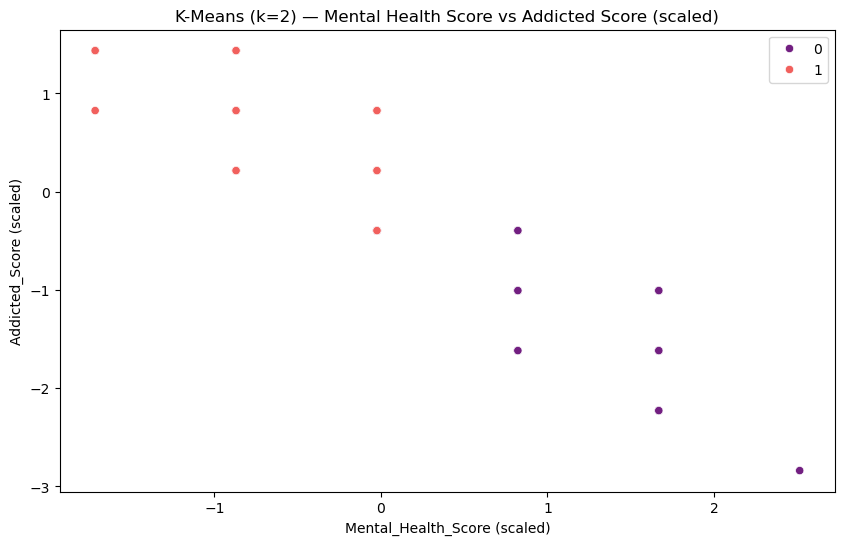

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_copy["Mental_Health_Score"],
    y=df_copy["Addicted_Score"],
    hue=labels_k,  
    palette="magma",  
)  
plt.title(f"K-Means (k={k}) — Mental Health Score vs Addicted Score (scaled)")
plt.xlabel("Mental_Health_Score (scaled)")
plt.ylabel("Addicted_Score (scaled)")
plt.show()

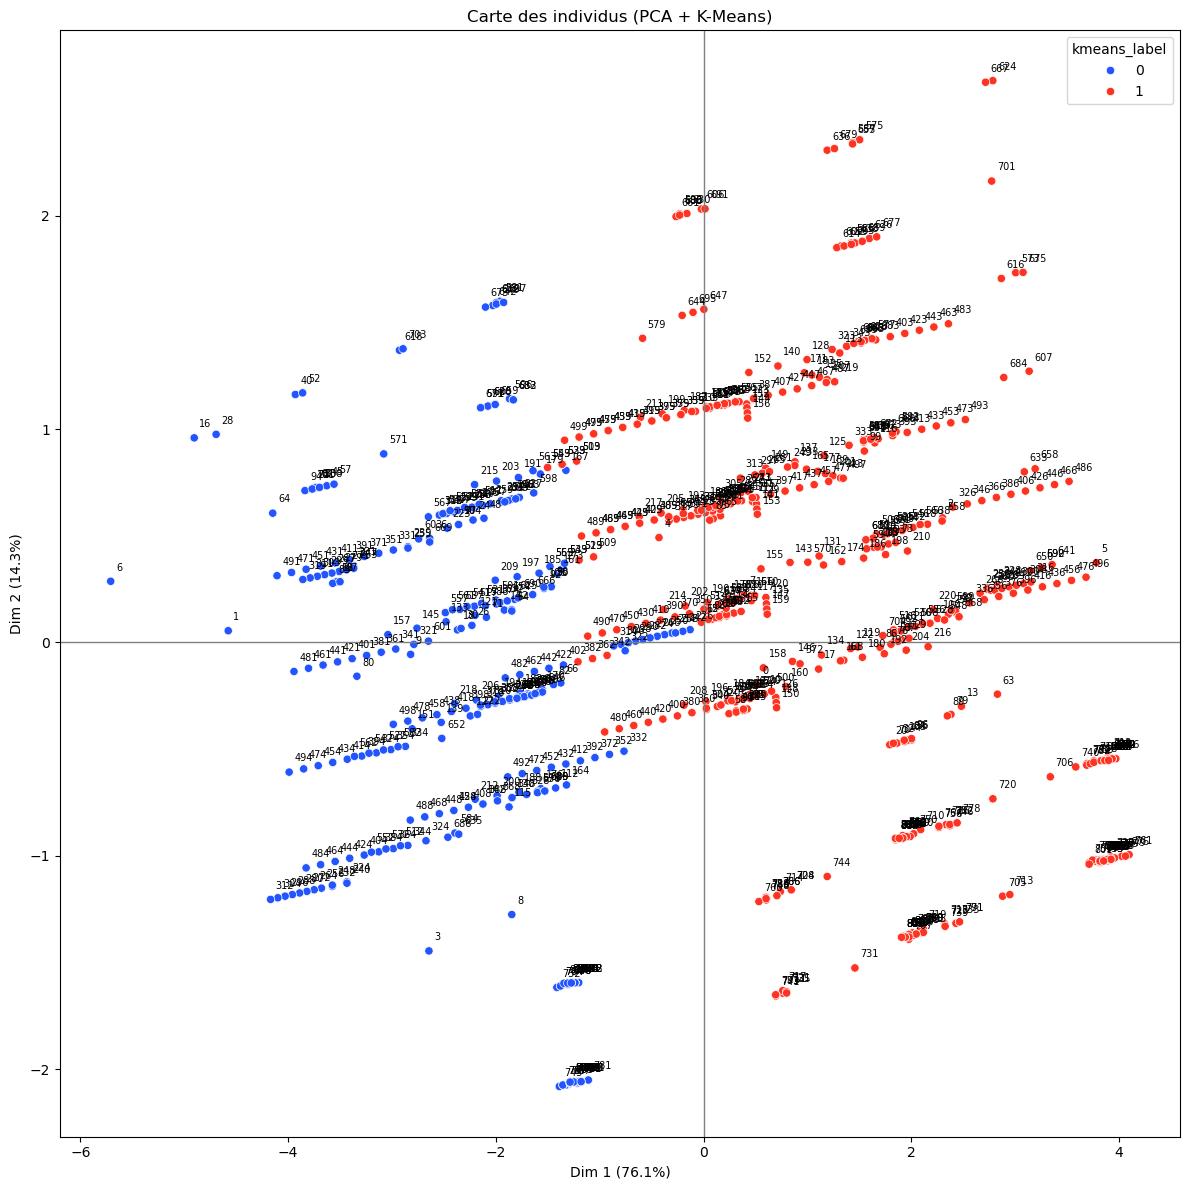

In [59]:
plt.figure(figsize=(12, 12))
sns.scatterplot(
    x=coords[:, 0],
    y=coords[:, 1],
    hue=df_copy["kmeans_label"],
    palette=["#2255ff", "#ff3322"],
)

for i, label in enumerate(df.index):
    plt.text(coords[i, 0] + 0.05, coords[i, 1] + 0.05, label, fontsize=7)

plt.axhline(0, color="grey", lw=1)
plt.axvline(0, color="grey", lw=1)

plt.xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Carte des individus (PCA + K-Means)")
plt.tight_layout()
plt.show()

**Interprétation** :  
Comme nous pouvons le voir sur le graphique ci-dessus, l'algorithme K-Means a réparti les individus de notre ensemble de données en 2 clusters principaux.  
Avec l'aide de l'ACP, nous pouvons en déduire que les 2 clusters sont : **bon mode de vie**, **mauvais mode de vie**.
- Les points en **bleu** représentent les étudiants ayant un **bon mode de vie**.
- Les points en **rouge** représentent les étudiants ayant un **mauvais mode de vie**.

# HC + K-means

## 1. HC

In [60]:
df_copy.head()

,Age,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Female,Gender_Male,...,Most_Used_Platform_Snapchat,Most_Used_Platform_LINE,Most_Used_Platform_KakaoTalk,Most_Used_Platform_VKontakte,Most_Used_Platform_WhatsApp,Most_Used_Platform_WeChat,Relationship_Status_In Relationship,Relationship_Status_Single,Relationship_Status_Complicated,kmeans_label
0,-0.346811,-0.140006,0.056528,0.716504,-0.119376,-0.023372,-0.025966,0.823754,0.998896,-0.998896,...,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,1.238957,-1.001106,-0.342467,1
1,1.058549,1.152909,-2.433100,-1.395666,0.729294,1.668735,-2.845841,-2.229059,-1.001106,1.001106,...,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,-0.807131,0.998896,-0.342467,0
2,0.121643,-0.140006,0.699013,0.716504,-1.392382,-0.869425,0.913993,1.434316,0.998896,-0.998896,...,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,-0.807131,-1.001106,2.919986,1
3,-0.815264,-1.432921,-1.710305,-1.395666,0.304959,0.822681,-1.905883,-1.618497,-1.001106,1.001106,...,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,-0.807131,0.998896,-0.342467,0
4,0.590096,1.152909,-0.505646,0.716504,-0.543712,-0.023372,-0.965924,0.213191,-1.001106,1.001106,...,-0.226061,-0.115922,-0.115922,-0.115922,-0.251902,-0.129823,1.238957,-1.001106,-0.342467,1


`df_copy` is already encoded and standardized

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram

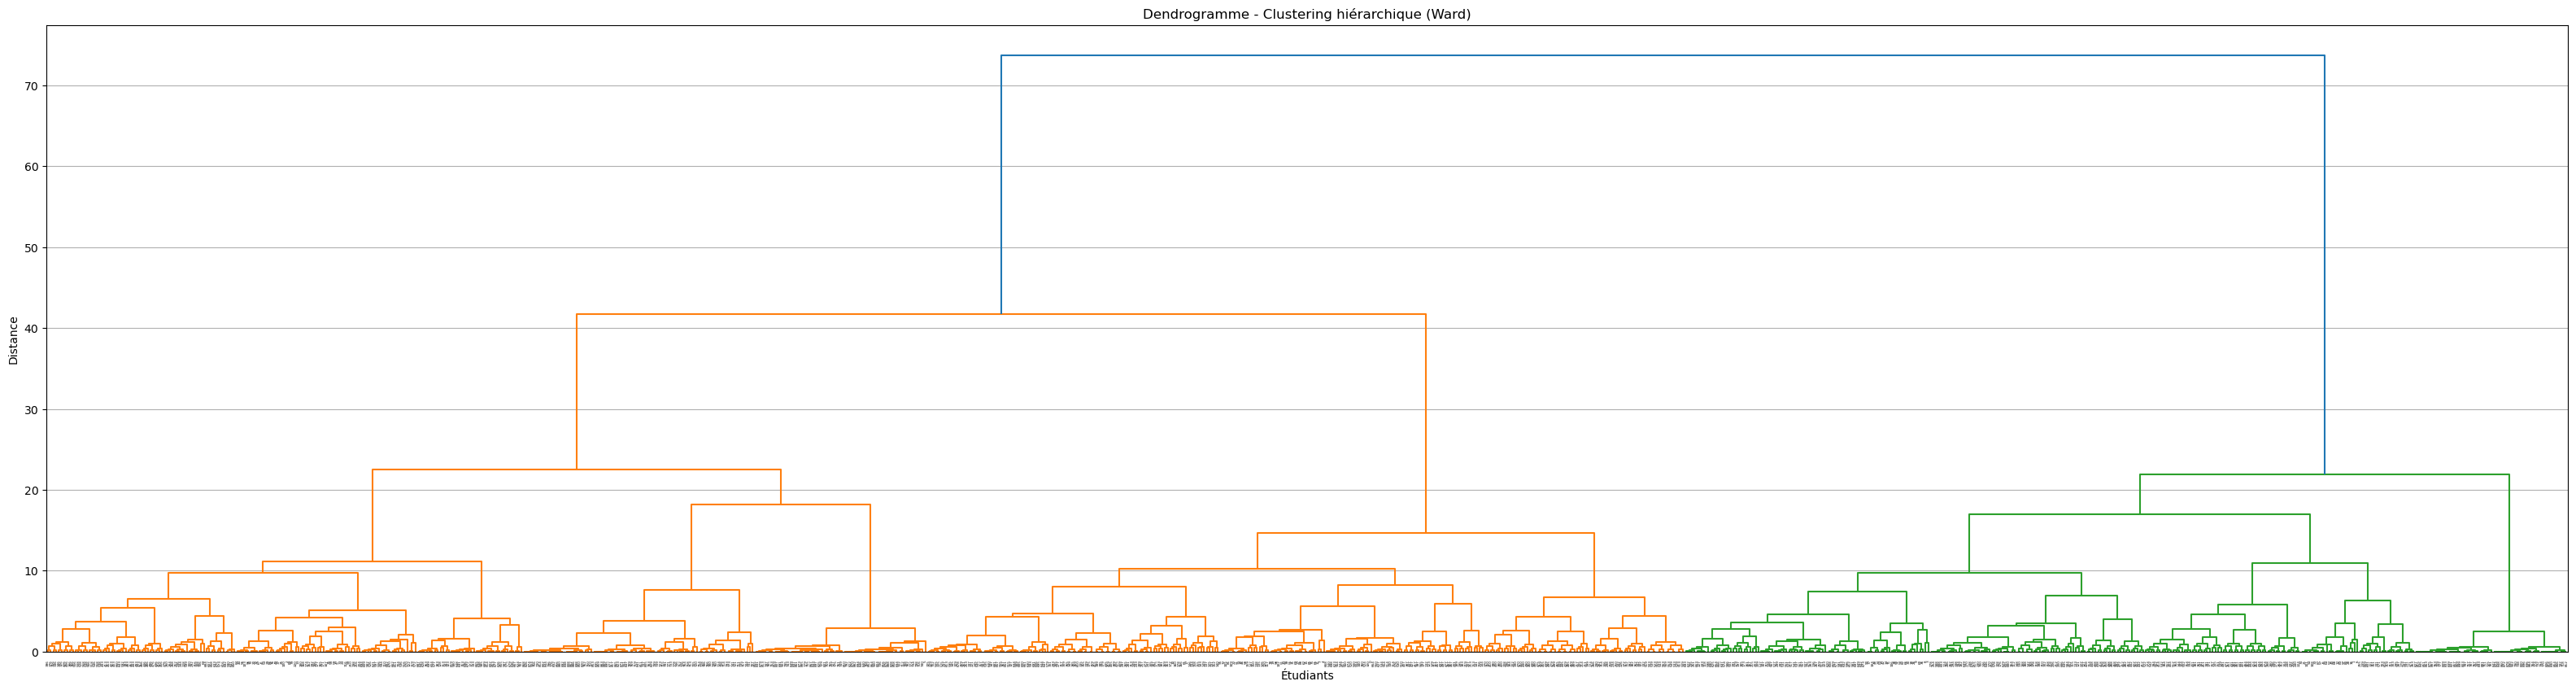

In [62]:
Z = linkage(
    df_copy[df.select_dtypes("number").columns],
    method="ward",
)
plt.figure(figsize=(40, 10))
dendrogram(Z, no_labels=False, count_sort="descending", leaf_font_size=3)  # type: ignore
plt.title("Dendrogramme - Clustering hiérarchique (Ward)")
plt.xlabel("Étudiants")
plt.ylabel("Distance")
plt.grid(axis='y')
plt.show()

In [63]:
print('Orange:')
display(df.iloc[[396, 708, 720, 788, 882, 750, 536, 119]])
display(df.iloc[[123, 219, 460, 429, 563, 392, 250, 553]])

print('Vert:')
display(df.iloc[[673, 654, 517, 683, 77, 414, 424, 16, 231]])
display(df.iloc[[751, 848, 774, 790, 794, 812, 777, 842, 732]])

Orange:


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
396,19,Female,Undergraduate,USA,7.5,Instagram,Yes,4.8,5,In Relationship,4,9
708,17,Male,High School,Australia,5.9,Instagram,Yes,6.0,6,Complicated,3,7
720,17,Male,High School,Nigeria,6.8,Instagram,Yes,5.2,5,In Relationship,4,9
788,17,Male,High School,Chile,6.8,Instagram,Yes,4.8,4,Single,5,9
882,17,Male,High School,Indonesia,7.1,Snapchat,Yes,4.5,4,In Relationship,5,9
750,17,Male,High School,New Zealand,5.9,TikTok,Yes,5.7,5,Complicated,4,8
536,19,Female,Undergraduate,UAE,6.8,Instagram,Yes,6.2,5,In Relationship,4,8
119,19,Female,Undergraduate,Pakistan,5.4,Instagram,Yes,6.2,5,In Relationship,4,8


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
123,22,Female,Graduate,India,5.8,Instagram,Yes,5.8,6,In Relationship,3,7
219,22,Male,Graduate,Maldives,4.5,TikTok,Yes,4.1,6,In Relationship,4,8
460,19,Female,Undergraduate,Spain,3.8,Instagram,Yes,8.1,6,Single,3,7
429,21,Male,Graduate,Canada,4.3,Instagram,Yes,7.9,6,Single,3,7
563,22,Male,Graduate,New Zealand,4.1,Instagram,Yes,8.1,7,In Relationship,3,6
392,19,Female,Undergraduate,Ireland,4.2,Instagram,Yes,7.7,7,Single,3,6
250,20,Female,Undergraduate,South Korea,4.9,KakaoTalk,Yes,6.9,6,Single,3,6
553,21,Male,Graduate,New Zealand,4.2,Facebook,Yes,8.0,7,In Relationship,3,6


Vert:


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
673,24,Male,Graduate,Denmark,4.5,Twitter,No,7.3,7,In Relationship,2,5
654,21,Female,Undergraduate,Finland,4.4,Instagram,No,7.4,7,In Relationship,2,5
517,21,Male,Graduate,Poland,4.1,Facebook,No,8.0,7,Single,2,5
683,23,Male,Graduate,Italy,4.8,Facebook,No,7.1,7,In Relationship,2,5
77,22,Female,Graduate,Kyrgyzstan,2.9,Facebook,No,7.0,7,In Relationship,2,5
414,20,Female,Undergraduate,Switzerland,3.0,Instagram,No,8.8,8,Single,2,4
424,19,Female,Undergraduate,Switzerland,2.9,Instagram,No,8.9,8,Single,2,4
16,24,Male,Graduate,Sweden,2.0,LinkedIn,No,7.8,8,Single,0,3
231,22,Male,Graduate,Germany,4.0,Instagram,No,7.9,8,Single,1,4


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
751,16,Female,High School,Singapore,4.7,Instagram,No,7.1,7,Single,2,5
848,17,Male,High School,Egypt,4.9,Instagram,No,7.2,7,Single,2,5
774,17,Male,High School,Japan,4.7,Facebook,No,7.3,7,Single,2,5
790,17,Male,High School,Peru,4.8,Instagram,No,7.2,7,In Relationship,2,5
794,17,Male,High School,Paraguay,4.9,Facebook,No,7.1,7,Single,2,5
812,17,Male,High School,Ireland,4.9,Instagram,No,7.0,7,Single,2,5
777,16,Female,High School,India,4.8,Instagram,No,7.2,7,Single,2,5
842,17,Male,High School,Mexico,4.9,Instagram,No,7.2,7,Single,2,5
732,17,Male,High School,Bolivia,4.6,Facebook,No,7.3,7,In Relationship,2,5


**Interprétation** :  
À partir du dendrogramme et des DataFrames affichés qui contiennent des étudiants échantillons de notre ensemble de données (choisis selon le dendrogramme), nous pouvons voir que le clustering hiérarchique a découvert deux **principaux** clusters :  

- Un cluster qui regroupe les étudiants avec un score d'addiction **élevé** (représenté par la couleur **orange**).  
- Un cluster qui regroupe les étudiants avec un score d'addiction **faible à moyen** (représenté par la couleur **vert**).  

De plus, nous observons que les performances académiques des étudiants du cluster **orange** sont affectées par les réseaux sociaux, tandis que celles des étudiants du cluster **vert** ne le sont pas.  

Une autre observation intéressante est que le cluster **orange** peut être divisé davantage en deux sous-clusters, où le premier regroupe les étudiants ayant un score d'addiction plus élevé que ceux du second.  

Pour le cluster **vert**, nous pouvons voir que des étudiants sont regroupés tout à droite du dendrogramme et, d'après les deux derniers DataFrames affichés, nous pouvons déduire qu'ils ont un âge compris entre 16 et 18 ans.

## 2. K-means

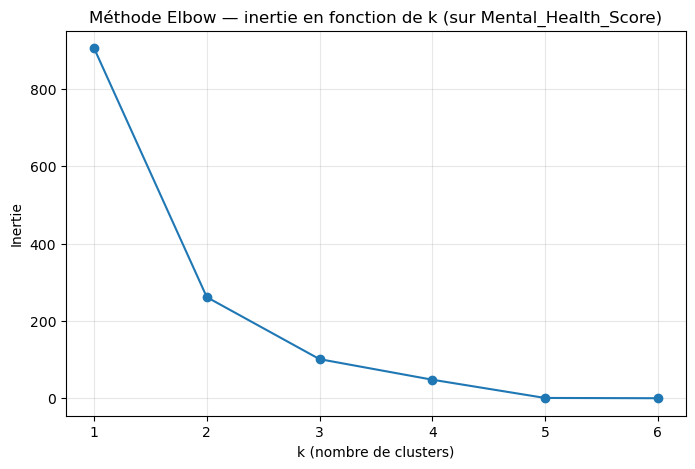

In [64]:
inertias = []
max_distinct = df['Addicted_Score'].nunique()
K_range = range(1, min(11, max_distinct -1))
for kk in K_range:
    km = KMeans(n_clusters=kk, random_state=0, n_init=10)
    km.fit(df_copy.loc[:,['Mental_Health_Score']]) 
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(K_range), inertias, marker='o')
plt.title('Méthode Elbow — inertie en fonction de k (sur Mental_Health_Score)')
plt.xlabel('k (nombre de clusters)')
plt.ylabel('Inertie')
plt.grid(True, alpha=0.3)
plt.show()

In [65]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
k_labels = kmeans.fit_predict(df_copy.drop(columns=['kmeans_label'])) 
df['kmeans_label'] = k_labels

In [66]:
df_sorted = df.sort_values(by='kmeans_label')

for i in range(3):
    print("kmeans_label =",i)
    display(df_sorted[df_sorted['kmeans_label'] == i].sample(10, random_state=42))

kmeans_label = 0


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,kmeans_label
223,22,Male,Graduate,Germany,4.2,Facebook,No,7.8,7,In Relationship,2,4,0
38,21,Male,Undergraduate,Egypt,3.9,YouTube,No,6.5,7,Complicated,2,6,0
669,22,Male,Graduate,Japan,4.4,Twitter,No,7.4,8,Single,2,4,0
732,17,Male,High School,Bolivia,4.6,Facebook,No,7.3,7,In Relationship,2,5,0
45,23,Female,Graduate,Chile,2.7,LinkedIn,No,7.1,8,Complicated,1,4,0
303,22,Male,Graduate,Germany,3.3,Facebook,No,8.2,8,In Relationship,1,4,0
173,21,Male,Graduate,India,5.1,Facebook,No,7.4,7,In Relationship,2,6,0
605,19,Male,Undergraduate,Denmark,4.7,Instagram,No,7.2,7,In Relationship,2,5,0
224,19,Female,Undergraduate,Japan,3.8,LINE,No,7.9,8,Single,1,3,0
863,16,Female,High School,Bahamas,4.8,Instagram,No,7.3,7,Single,2,5,0


kmeans_label = 1


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,kmeans_label
190,20,Female,Undergraduate,Bangladesh,4.5,Instagram,Yes,7.2,5,Single,3,7,1
225,21,Male,Graduate,Italy,5.5,Instagram,Yes,6.8,6,Single,3,7,1
340,19,Female,Undergraduate,Spain,5.0,Instagram,Yes,6.9,6,Single,3,7,1
298,20,Female,Undergraduate,South Korea,4.4,KakaoTalk,Yes,7.4,6,Single,3,6,1
39,20,Female,Undergraduate,Morocco,4.5,TikTok,Yes,5.8,6,Single,3,7,1
81,19,Female,Undergraduate,Azerbaijan,4.8,TikTok,Yes,5.7,6,Single,3,7,1
123,22,Female,Graduate,India,5.8,Instagram,Yes,5.8,6,In Relationship,3,7,1
665,23,Male,Graduate,UK,6.3,Twitter,Yes,6.2,5,Single,4,8,1
503,22,Male,Graduate,New Zealand,4.7,Instagram,Yes,7.5,7,In Relationship,3,6,1
289,21,Male,Graduate,Italy,5.2,Instagram,Yes,6.9,5,Single,3,7,1


kmeans_label = 2


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,kmeans_label
49,19,Female,High School,Ecuador,6.3,Instagram,Yes,5.2,5,Complicated,4,9,2
904,17,Male,High School,Brazil,5.6,TikTok,Yes,5.8,5,Complicated,4,8,2
782,17,Male,High School,Russia,6.7,YouTube,Yes,4.8,4,Single,5,9,2
832,17,Male,High School,Canada,5.6,TikTok,Yes,5.9,5,Complicated,4,8,2
855,16,Female,High School,Ecuador,6.8,YouTube,Yes,4.8,4,In Relationship,5,9,2
758,17,Male,High School,Hong Kong,6.3,Snapchat,Yes,5.4,5,In Relationship,4,8,2
79,18,Female,High School,Armenia,5.9,Instagram,Yes,5.2,5,Complicated,4,9,2
426,20,Female,Undergraduate,USA,7.8,TikTok,Yes,4.5,5,In Relationship,4,9,2
35,20,Female,Undergraduate,Turkey,5.6,TikTok,Yes,5.5,5,Complicated,4,8,2
783,16,Female,High School,Nigeria,5.8,TikTok,Yes,5.7,5,Complicated,4,8,2


À partir des DataFrames affichés, K-Means a regroupé les étudiants en 3 clusters :
- **Cluster 1 (kmeans_label = 0)** : étudiants à faible utilisation des réseaux sociaux, associés à un meilleur sommeil et un niveau d’addiction plus faible.
- **Cluster 2 (kmeans_label = 1)** : étudiants présentant un usage modéré des réseaux sociaux, avec des indicateurs moyens de santé mentale et de sommeil.
- **Cluster 3 (kmeans_label = 2)** : étudiants caractérisés par une forte utilisation des réseaux sociaux, un score d’addiction élevé et un nombre réduit d’heures de sommeil.